In [1]:
import sys
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import time

In [2]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

### SAM Mask Layover Function

In [3]:
def show_anns(anns,display="all",mask_num=0):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    if display == "all":
        for ann in sorted_anns:
            m = ann['segmentation']
            color_mask = np.concatenate([np.random.random(3), [0.35]])
            img[m] = color_mask
    elif display == "single_mask":
        ann = sorted_anns[mask_num]
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

# Load SAM Model ViT_H

In [4]:
sam_h = sam_model_registry["vit_h"](checkpoint="models/vit_h/sam_vit_h_4b8939.pth")
mask_h_generator = SamAutomaticMaskGenerator(sam_h)

# Load SAM Model ViT_L

In [5]:
sam_l = sam_model_registry["vit_l"](checkpoint="models/vit_l/sam_vit_l_0b3195.pth")
mask_l_generator = SamAutomaticMaskGenerator(sam_l)

# Load SAM Model ViT_B

In [6]:
sam_b = sam_model_registry["vit_b"](checkpoint="models/vit_b/sam_vit_b_01ec64.pth")
mask_b_generator = SamAutomaticMaskGenerator(sam_b)

# Testing!

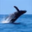

In [7]:
test1_image = "/Users/elirotondo/Documents/GitHub/ece590_fall2024/datasets/c100_extracted/images/fin_whale_s_000867.png"
t1_img = Image.open(test1_image)
display(t1_img)
t1_img = np.array(t1_img)

In [8]:
start_time = time.time()
h_t1_masks = mask_h_generator.generate(t1_img)
print("Time: " + str(round(time.time() - start_time,2)))

Time: 77.89


In [9]:
len(h_t1_masks)

3

In [10]:
start_time = time.time()
l_t1_masks = mask_l_generator.generate(t1_img)
print("Time: " + str(round(time.time() - start_time,2)))

Time: 63.78


In [11]:
len(l_t1_masks)

3

In [12]:
start_time = time.time()
b_t1_masks = mask_b_generator.generate(t1_img)
print("Time: " + str(round(time.time() - start_time,2)))

Time: 55.44


In [13]:
len(b_t1_masks)

3

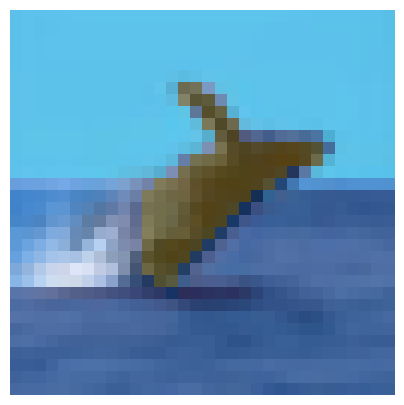

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(t1_img)
show_anns(h_t1_masks)
plt.axis('off')
plt.show() 

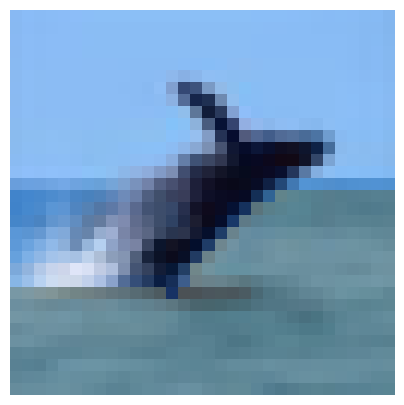

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(t1_img)
show_anns(h_t1_masks,display="single_mask",mask_num=0)
plt.axis('off')
plt.show() 

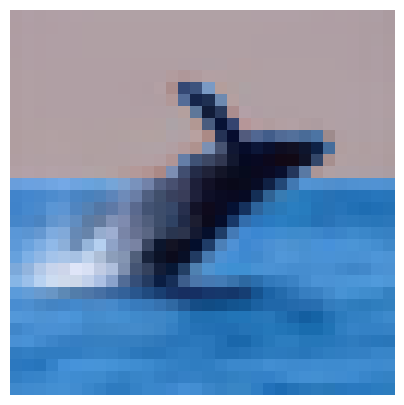

In [16]:
plt.figure(figsize=(5,5))
plt.imshow(t1_img)
show_anns(h_t1_masks,display="single_mask",mask_num=1)
plt.axis('off')
plt.show() 

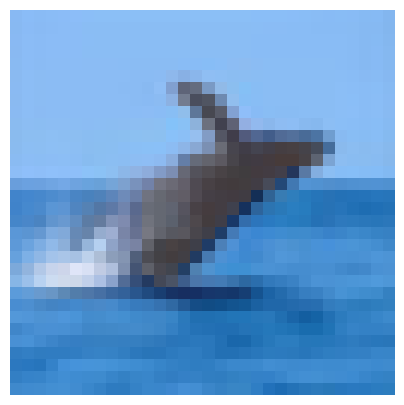

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(t1_img)
show_anns(h_t1_masks,display="single_mask",mask_num=2)
plt.axis('off')
plt.show() 

In [19]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=3)
# plt.axis('off')
# plt.show() 

In [20]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=4)
# plt.axis('off')
# plt.show() 

In [21]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=5)
# plt.axis('off')
# plt.show() 

In [22]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=6)
# plt.axis('off')
# plt.show() 

In [23]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=7)
# plt.axis('off')
# plt.show() 

In [24]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=8)
# plt.axis('off')
# plt.show() 

In [25]:
# plt.figure(figsize=(5,5))
# plt.imshow(t1_img)
# show_anns(h_t1_masks,display="single_mask",mask_num=39)
# plt.axis('off')
# plt.show() 

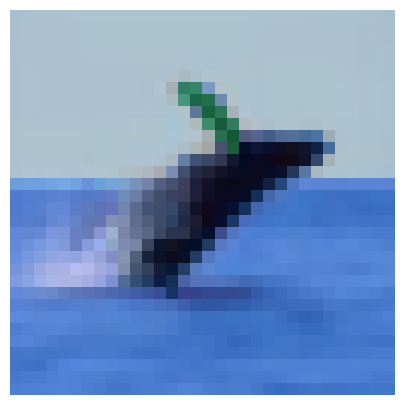

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(t1_img)
show_anns(l_t1_masks)
plt.axis('off')
plt.show() 

In [27]:
def show_anns_black(anns,display="all",mask_num=0):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    if display == "all":
        for ann in sorted_anns:
            m = ann['segmentation']
            color_mask = np.concatenate([[0,0,0], [1]])
            img[m] = color_mask
    elif display == "single_mask":
        ann = sorted_anns[mask_num]
        m = ann['segmentation']
        color_mask = np.concatenate([[0,0,0], [1]])
        img[m] = color_mask
    ax.imshow(img)

In [28]:
def disp_helper(img,masks,i,blackout=False):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    if blackout:
        show_anns_black(masks,display="single_mask",mask_num=i)
    else:
        show_anns(masks,display="single_mask",mask_num=i)
    plt.axis('off')
    plt.show() 

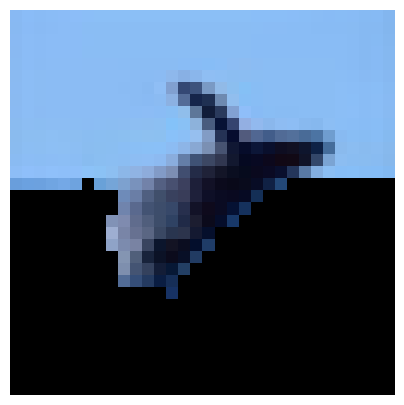

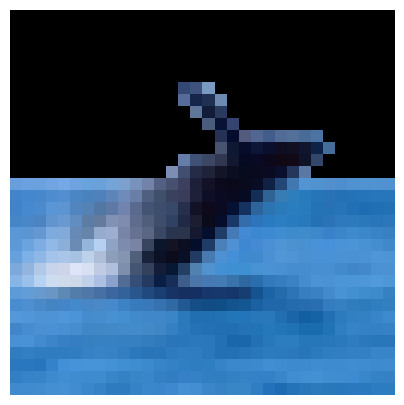

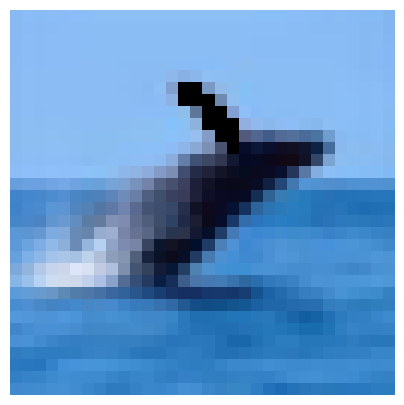

In [29]:
for i in range(len(l_t1_masks)):
    #disp_helper(t1_img,l_t1_masks,i)
    disp_helper(t1_img,l_t1_masks,i,blackout=True)

### CIFAR
32 x 32 Pixels:
- Max area of mask: 1,024 units
    - Idea: Threshold considered masks by restricting minimum area to be 1/4 max area or greater?

In [30]:
l_t1_masks[0].keys()

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

In [31]:
l_t1_masks[0]["crop_box"]

[0, 0, 32, 32]

In [32]:
h_t1_masks_keep = [m for m in h_t1_masks if m["area"] >= 256]
for m in h_t1_masks_keep:
    print(m["area"])

391
401


In [33]:
l_t1_masks_keep = [m for m in l_t1_masks if m["area"] >= 256]
for m in l_t1_masks_keep:
    print(m["area"])

392
483


In [34]:
b_t1_masks_keep = [m for m in b_t1_masks if m["area"] >= 256]
for m in b_t1_masks_keep:
    print(m["area"])
for m in b_t1_masks:
    print(m["area"])

387
387
3
3


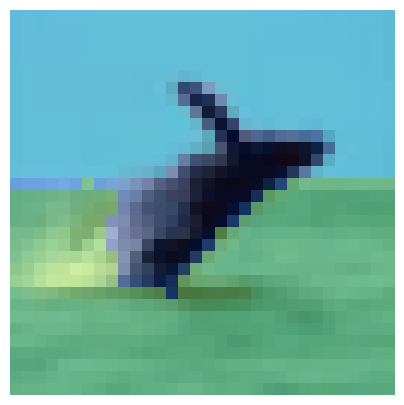

In [35]:
plt.figure(figsize=(5,5))
plt.imshow(t1_img)
show_anns(l_t1_masks_keep)
plt.axis('off')
plt.show() 

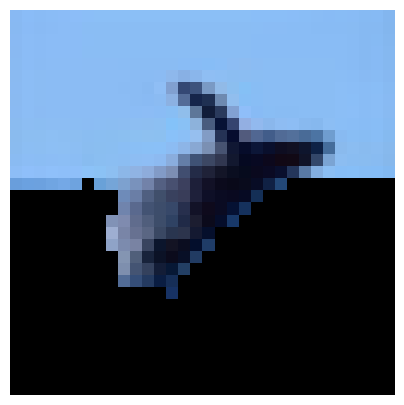

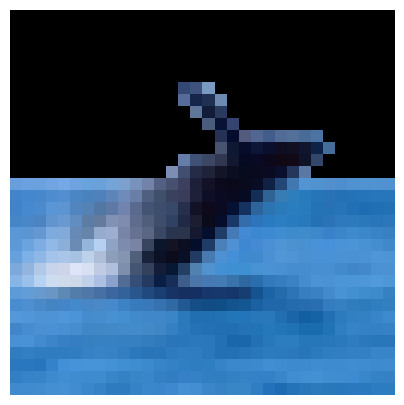

In [36]:
for i in range(len(l_t1_masks_keep)):
    #disp_helper(t1_img,l_t1_masks,i)
    disp_helper(t1_img,l_t1_masks_keep,i,blackout=True)

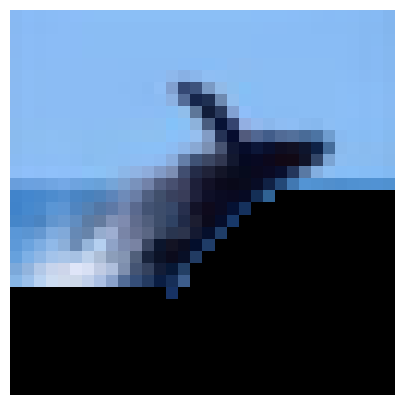

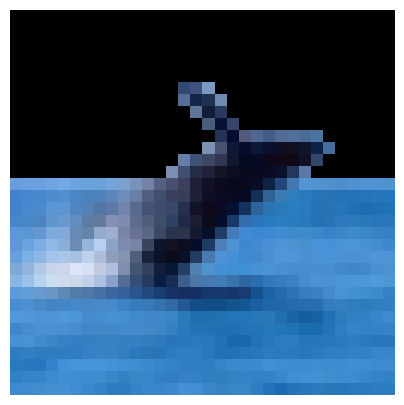

In [37]:
for i in range(len(h_t1_masks_keep)):
    #disp_helper(t1_img,l_t1_masks,i)
    disp_helper(t1_img,h_t1_masks_keep,i,blackout=True)